In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

import ml_utils

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [3]:
#Please change to your name.
name = "Rod Sunio"

#Please use this to control EDA. 
show_eda = False

In [2]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
28,0,0.649,0.582,0.677,0.649,0.148,0.838,0.891,0.301,0.553,...,0.823,0.726,0.119,0.073,0.496,0.311,0.800,0.974,0.213,0.143
216,1,0.417,0.362,0.084,0.182,0.281,0.244,0.266,0.400,0.582,...,0.630,0.592,0.659,0.037,0.852,0.501,0.462,0.290,0.357,0.437
236,1,0.028,0.953,0.039,0.132,0.987,0.456,0.640,0.251,0.118,...,0.205,0.524,0.887,0.278,0.357,0.300,0.120,0.145,0.304,0.067
148,0,0.989,0.354,0.980,0.874,0.063,0.324,0.742,0.823,0.764,...,0.815,0.950,0.847,0.682,0.289,0.068,0.118,0.250,0.694,0.775
112,0,0.114,0.016,0.883,0.499,0.186,0.962,0.810,0.671,0.061,...,0.482,0.563,0.162,0.274,0.902,0.065,0.626,0.233,0.230,0.721


### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [3]:
df.shape

(250, 201)

In [4]:
df_eda = ml_utils.edaDF(df,"target")
print(df_eda.giveTarget())

target


In [5]:
df_eda.missing_values()

target     0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_196    0
var_197    0
var_198    0
var_199    0
var_200    0
Length: 201, dtype: int64

#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

9
Training Accuracy: 1.0
Testing Accuracy: 0.5238095238095238


[Text(0.34517045454545453, 0.95, 'var_177 <= 0.117\ngini = 0.499\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.13068181818181818, 0.85, 'var_141 <= 0.153\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.08522727272727272, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.17613636363636365, 0.75, 'var_152 <= 0.938\ngini = 0.071\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.13068181818181818, 0.65, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = True'),
 Text(0.2215909090909091, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.5596590909090909, 0.85, 'var_199 <= 0.854\ngini = 0.497\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.35795454545454547, 0.75, 'var_152 <= 0.847\ngini = 0.477\nsamples = 130\nvalue = [79, 51]\nclass = False'),
 Text(0.3125, 0.65, 'var_133 <= 0.342\ngini = 0.496\nsamples = 112\nvalue = [61, 51]\nclass = False'),
 Text(0.09090909090909091, 0.55, 'var_148 <= 0.09

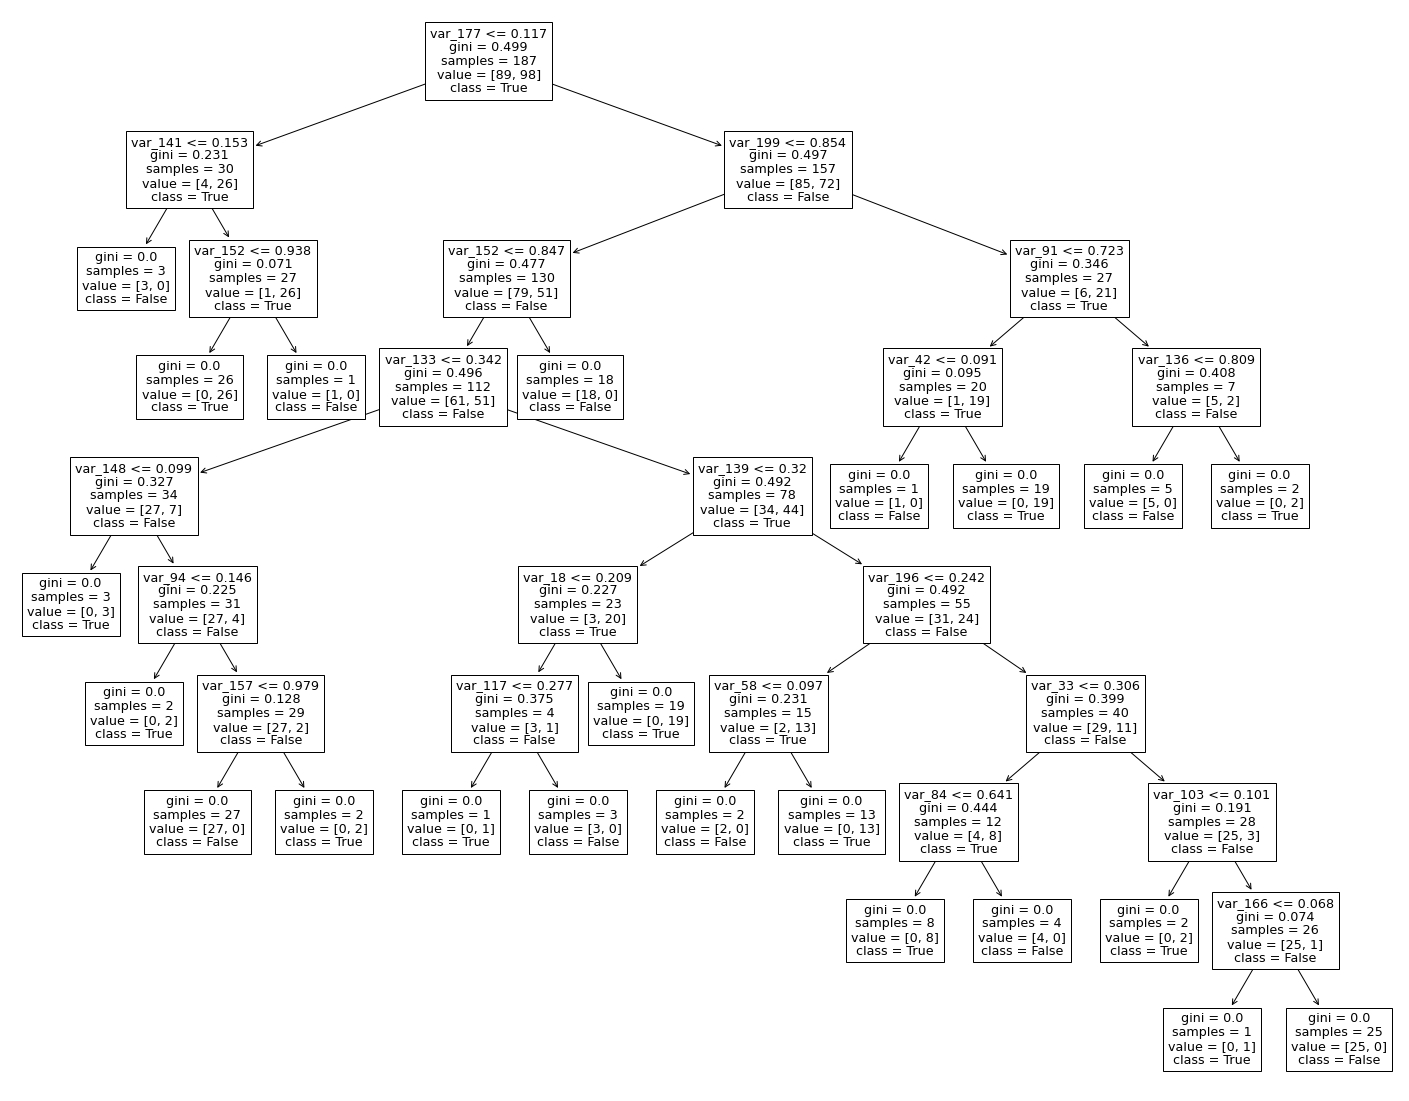

In [5]:
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

In [7]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=df2.drop(columns={"target"}).columns)
feat_imp.sort_values(ascending=False)[0:20]

var_178    0.089923
var_153    0.089587
var_197    0.081878
var_200    0.071222
var_140    0.065253
var_134    0.065145
var_85     0.057173
var_34     0.056382
var_142    0.053679
var_92     0.049057
var_149    0.044487
var_158    0.039923
var_19     0.039851
var_59     0.037163
var_104    0.036813
var_95     0.034771
var_137    0.030629
var_167    0.020615
var_43     0.020368
var_118    0.016080
dtype: float64

13
Training Accuracy: 1.0
Testing Accuracy: 0.4603174603174603


[Text(0.5882352941176471, 0.9642857142857143, 'var_177 <= 0.117\nentropy = 0.998\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.4117647058823529, 0.8928571428571429, 'var_141 <= 0.153\nentropy = 0.567\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.35294117647058826, 0.8214285714285714, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.47058823529411764, 0.8214285714285714, 'var_152 <= 0.938\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.4117647058823529, 0.75, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = True'),
 Text(0.5294117647058824, 0.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.7647058823529411, 0.8928571428571429, 'var_42 <= 0.912\nentropy = 0.995\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.7058823529411765, 0.8214285714285714, 'var_49 <= 0.931\nentropy = 1.0\nsamples = 145\nvalue = [73, 72]\nclass = False'),
 Text(0.6470588235294118, 0.75, 'var_6 <= 0.927\nent

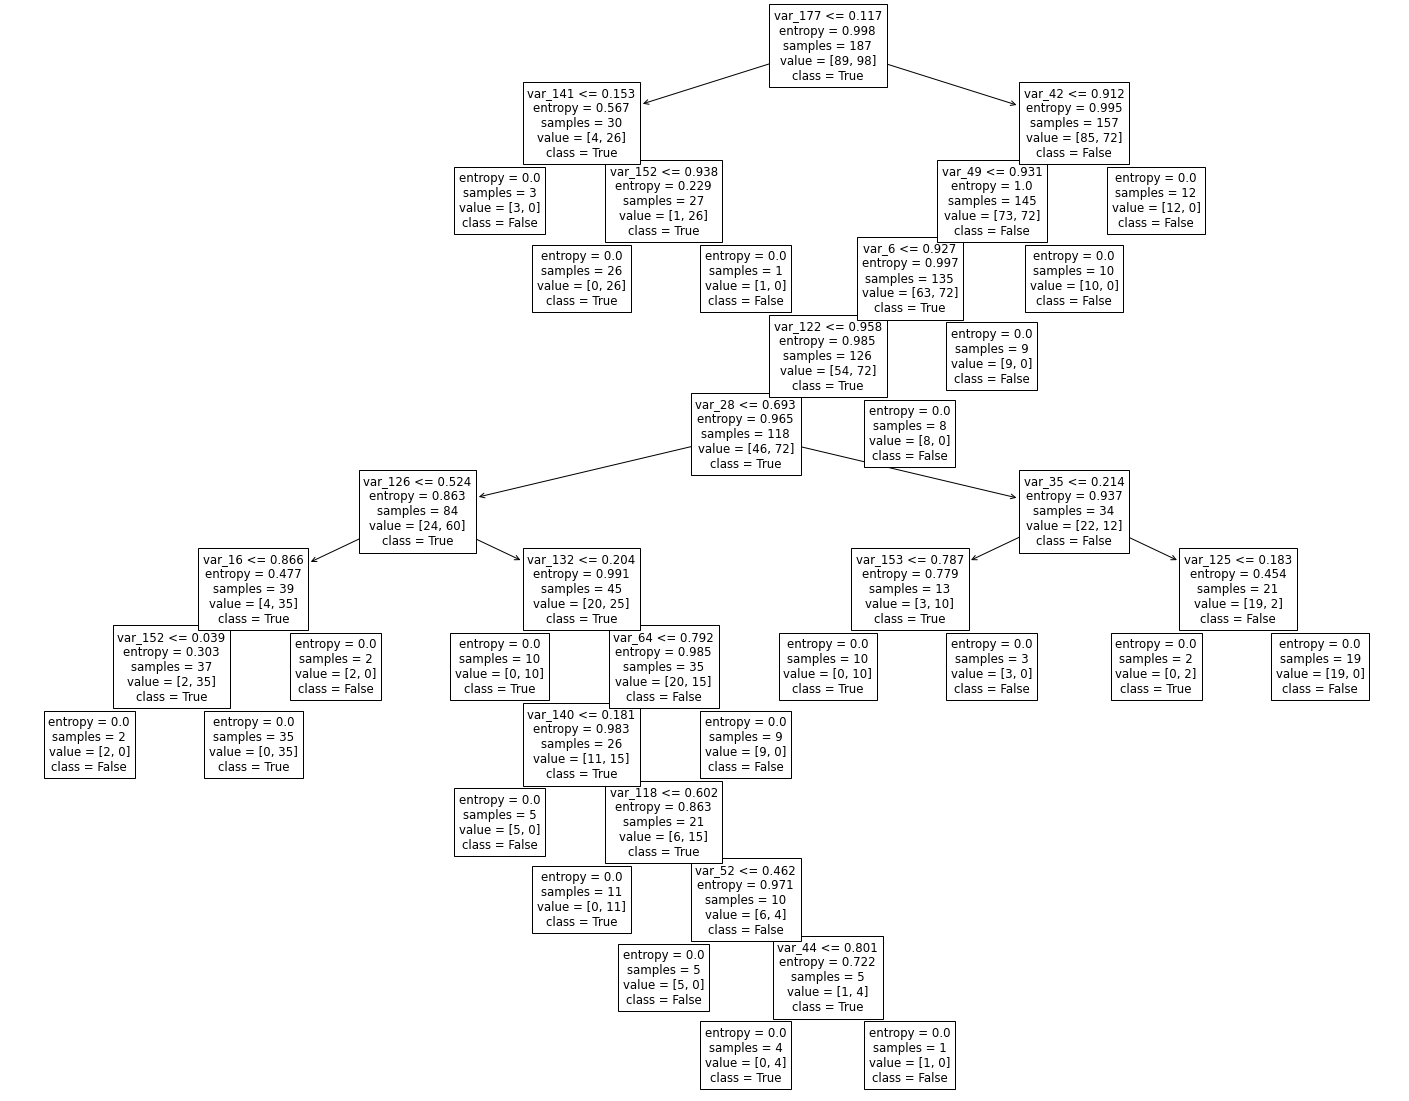

In [33]:
#Tree with entropy
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

5
Training Accuracy: 0.8342245989304813
Testing Accuracy: 0.6031746031746031


[Text(0.35294117647058826, 0.9166666666666666, 'var_177 <= 0.117\ngini = 0.499\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.11764705882352941, 0.75, 'var_141 <= 0.153\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.058823529411764705, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.17647058823529413, 0.5833333333333334, 'var_152 <= 0.938\ngini = 0.071\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.11764705882352941, 0.4166666666666667, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = True'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.5882352941176471, 0.75, 'var_199 <= 0.854\ngini = 0.497\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.4117647058823529, 0.5833333333333334, 'var_152 <= 0.847\ngini = 0.477\nsamples = 130\nvalue = [79, 51]\nclass = False'),
 Text(0.35294117647058826, 0.4166666666666667, 'var_133 <= 0.342\ng

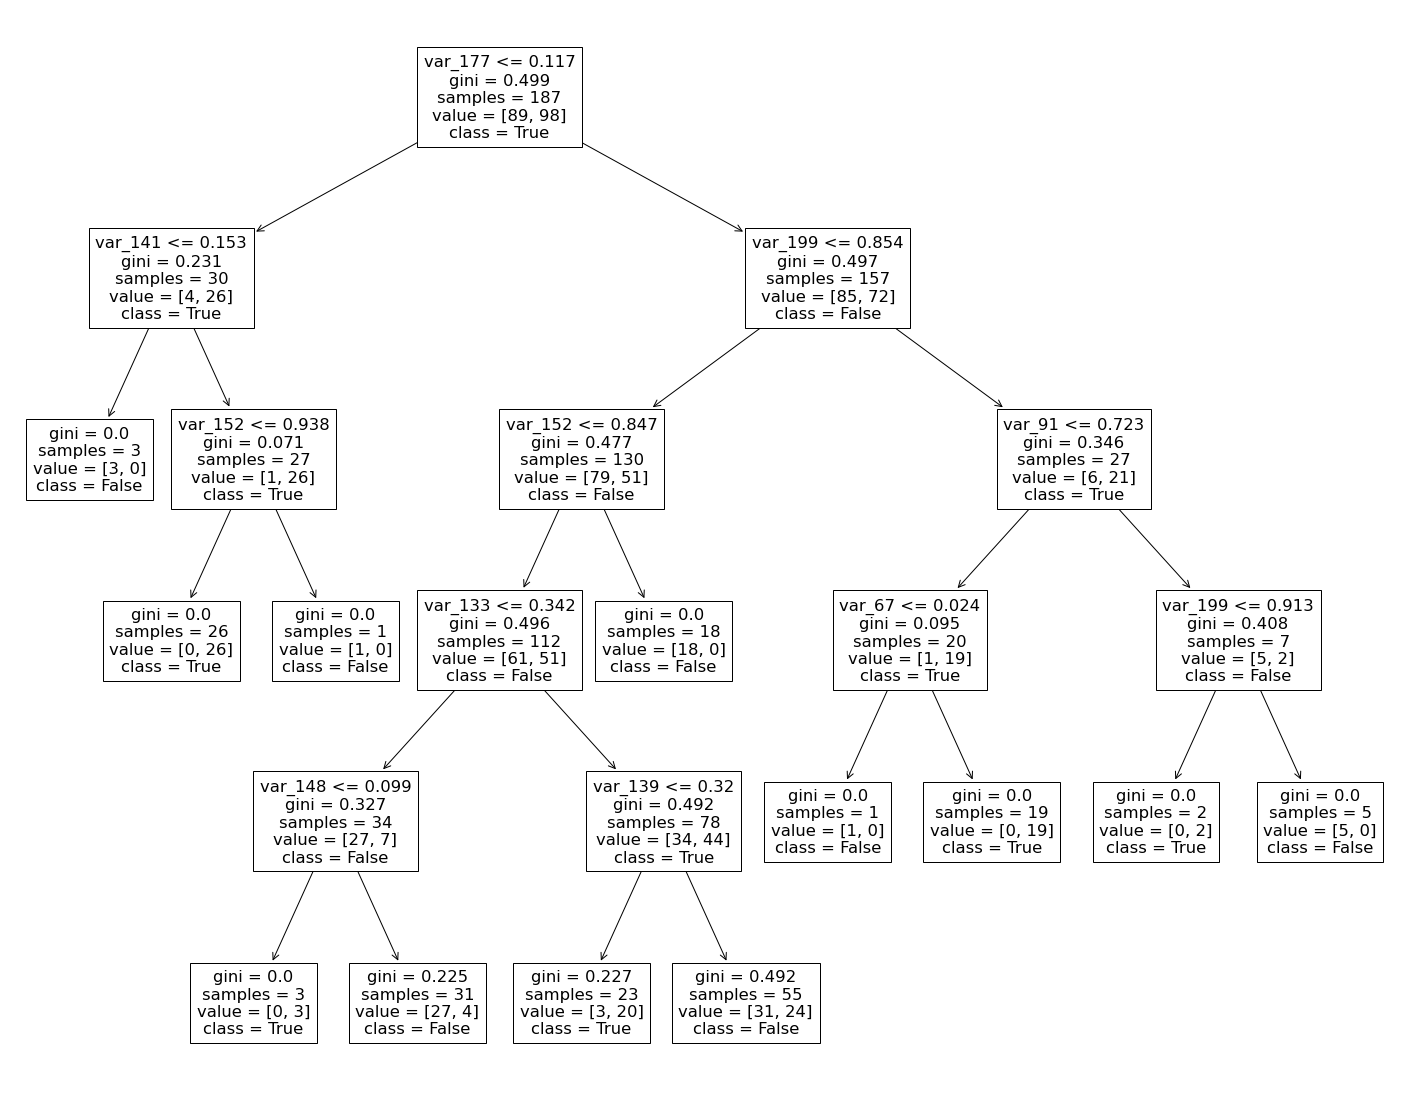

In [35]:
#limit depth
clf = DecisionTreeClassifier(max_depth=5, random_state= 0)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

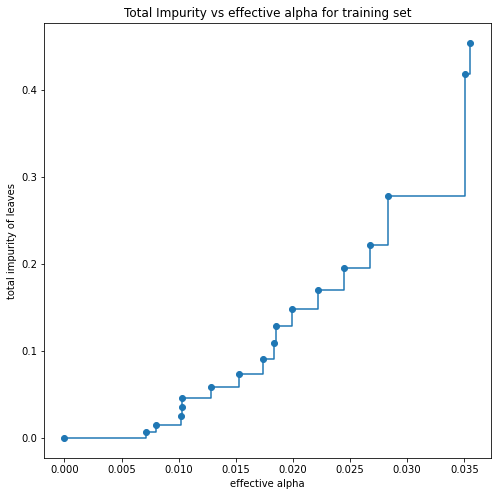

In [36]:
#limit depth
clf = DecisionTreeClassifier()

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

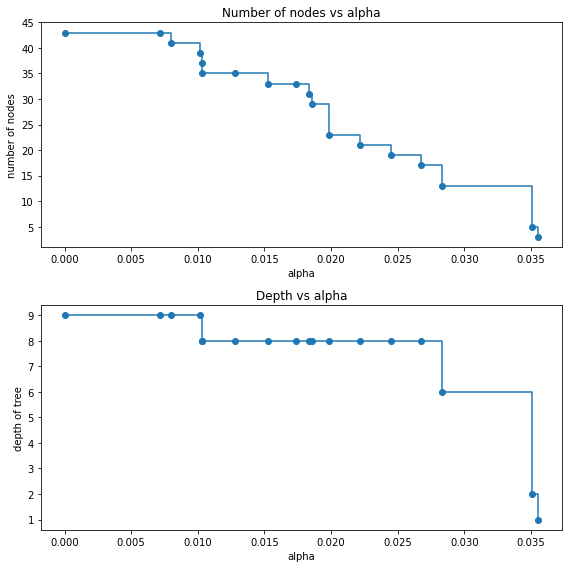

In [37]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

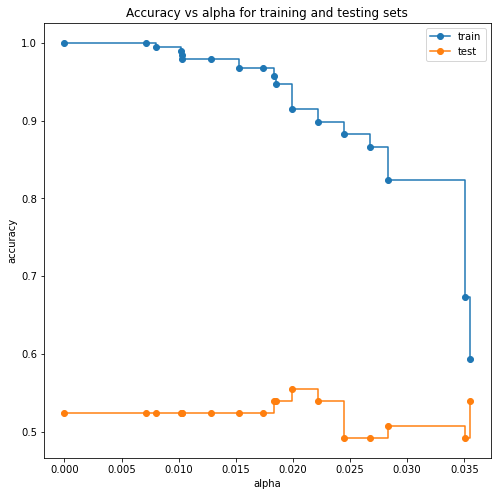

In [38]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

8
Training Accuracy: 0.9144385026737968
Testing Accuracy: 0.5555555555555556


[Text(0.4090909090909091, 0.9444444444444444, 'var_177 <= 0.117\ngini = 0.499\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.18181818181818182, 0.8333333333333334, 'var_141 <= 0.153\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.09090909090909091, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.2727272727272727, 0.7222222222222222, 'gini = 0.071\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.6363636363636364, 0.8333333333333334, 'var_199 <= 0.854\ngini = 0.497\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.45454545454545453, 0.7222222222222222, 'var_152 <= 0.847\ngini = 0.477\nsamples = 130\nvalue = [79, 51]\nclass = False'),
 Text(0.36363636363636365, 0.6111111111111112, 'var_133 <= 0.342\ngini = 0.496\nsamples = 112\nvalue = [61, 51]\nclass = False'),
 Text(0.18181818181818182, 0.5, 'var_148 <= 0.099\ngini = 0.327\nsamples = 34\nvalue = [27, 7]\nclass = False'),
 Text(0.09090909090909091, 0.

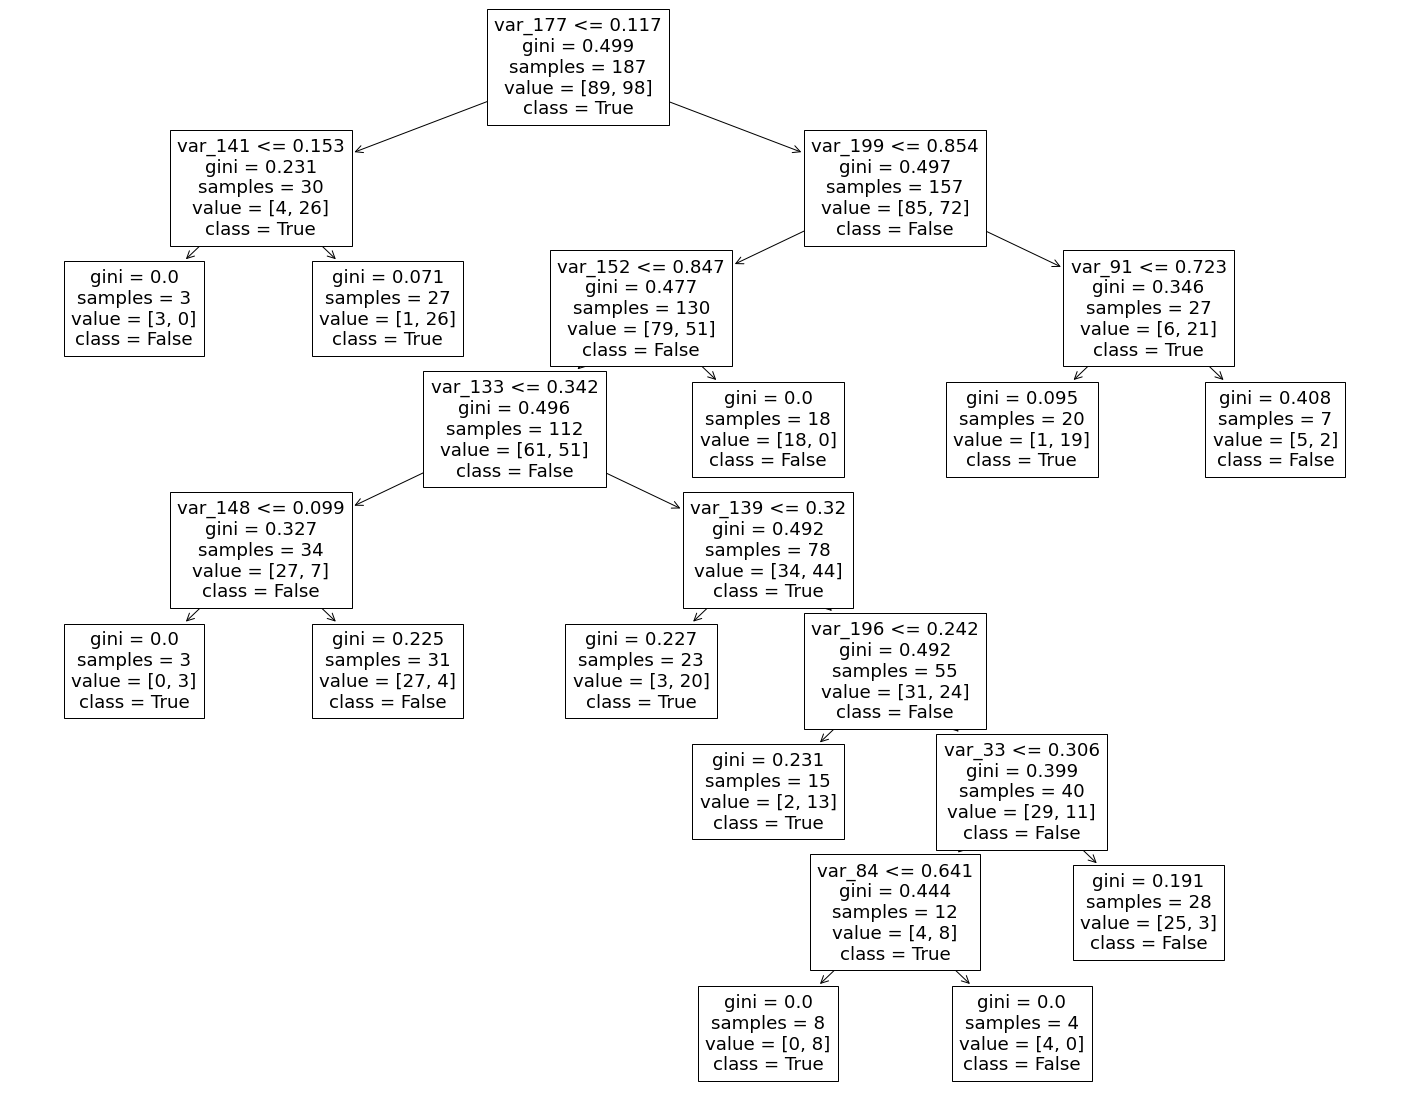

In [39]:
#Model pruned best
clf = DecisionTreeClassifier(ccp_alpha=.020, random_state=0)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

8
Training Accuracy: 0.8983957219251337
Testing Accuracy: 0.5396825396825397


[Text(0.4090909090909091, 0.9444444444444444, 'var_177 <= 0.117\ngini = 0.499\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.18181818181818182, 0.8333333333333334, 'var_141 <= 0.153\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.09090909090909091, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.2727272727272727, 0.7222222222222222, 'gini = 0.071\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.6363636363636364, 0.8333333333333334, 'var_199 <= 0.854\ngini = 0.497\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.45454545454545453, 0.7222222222222222, 'var_152 <= 0.847\ngini = 0.477\nsamples = 130\nvalue = [79, 51]\nclass = False'),
 Text(0.36363636363636365, 0.6111111111111112, 'var_133 <= 0.342\ngini = 0.496\nsamples = 112\nvalue = [61, 51]\nclass = False'),
 Text(0.2727272727272727, 0.5, 'gini = 0.327\nsamples = 34\nvalue = [27, 7]\nclass = False'),
 Text(0.45454545454545453, 0.5, 'var_139 <= 0.32

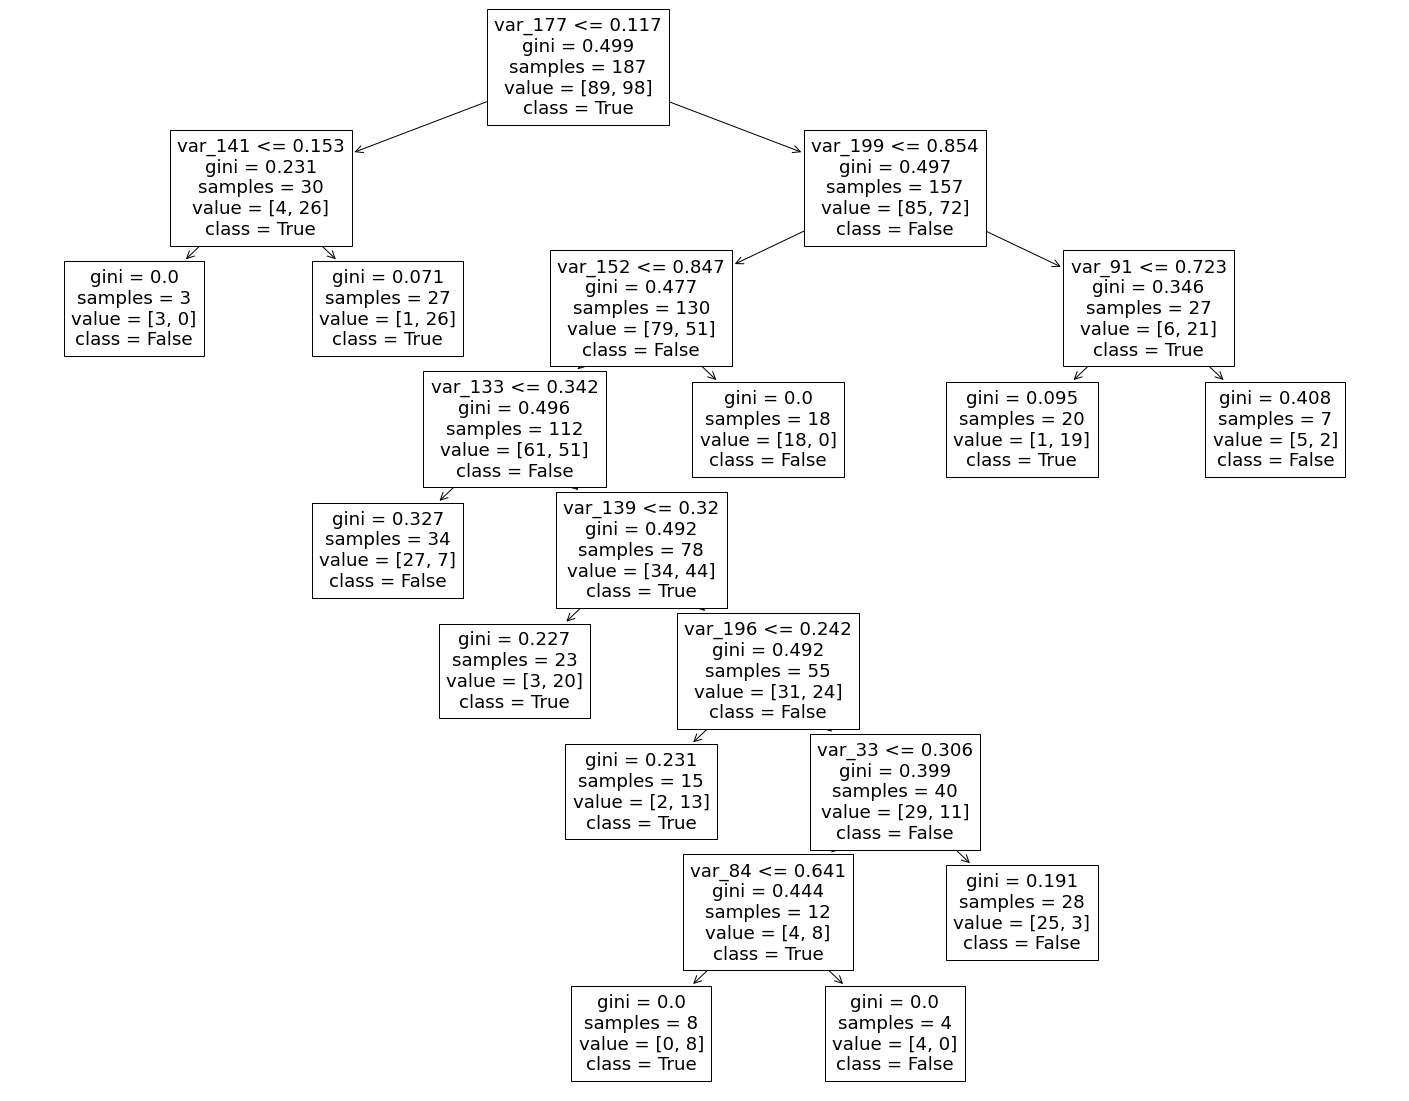

In [40]:
clf = DecisionTreeClassifier(ccp_alpha=.023, random_state=0)
clf = clf.fit(X_train, y_train)

print(clf.get_depth())
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=df.columns[:-1], class_names=["False","True"])

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Split data as normal
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Build pipeline
pipeline_steps = [('scaler', StandardScaler()),('DT', DecisionTreeClassifier()) ]
pipe = Pipeline(pipeline_steps)
# The pipeline can be used as any other estimator

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.5238095238095238

In [43]:
y_ = np.array(df2["target"]).reshape(-1,1)
X_ = np.array(df2.drop(columns={"target"}))
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)

scaler_ = MinMaxScaler()
estimator_ = RandomForestClassifier(n_jobs=-1)
pipe_ = Pipeline(steps=[("scaler", scaler_), ("forrest", estimator_)])

params_ = {'forrest__max_depth':[5,6,7,8,9], "forrest__n_estimators":[75,100,125]}
 
clf_ = GridSearchCV(pipe_, param_grid=params_, cv=5, n_jobs=-1) 
clf_.fit(X_train_, y_train_.ravel())
best = clf_.best_estimator_
print(best.score(X_test_, y_test_))
print(best)

0.6984126984126984
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forrest',
                 RandomForestClassifier(max_depth=6, n_estimators=75,
                                        n_jobs=-1))])


### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [44]:

print(best.score(X_test, y_test))
print(best)

0.9047619047619048
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forrest',
                 RandomForestClassifier(max_depth=6, n_estimators=75,
                                        n_jobs=-1))])


### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [34]:
#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


FileNotFoundError: [Errno 2] No such file or directory: 'testing.csv'

### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<ul>
<li>First was limiting the depth of the tree.
<li>Second was using the pruning technique in sklearn.
</ul>